In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tdf = pd.read_csv('working-csvs/grouped_w_topics.csv', index_col=0)

In [3]:
tdf

,date,speaker,text_enhanced,tokens,tprob_0,tprob_1,tprob_2,tprob_3,tprob_4,tprob_5,...,tprob_36,tprob_37,tprob_38,tprob_39,tprob_40,tprob_41,tprob_42,tprob_43,tprob_44,len
1696,1994-02-04,CHAIRMAN GREENSPAN.,"As you know, this is our organizational meetin...","['know', 'organiz', 'meet', 'alway', 'meet', '...",0.002360,0.001847,0.002183,0.080568,0.031129,0.001038,...,0.002574,0.002370,0.004235,0.003070,0.001608,0.002960,0.023677,0.029818,0.001092,3330
1697,1994-02-04,MR. BERNARD.,"Secretary and Economist, Donald Kohn; Deputy S...","['secretari', 'economist', 'donald', 'kohn', '...",0.005522,0.005147,0.005976,0.004956,0.004744,0.006510,...,0.007380,0.006113,0.004755,0.005623,0.006206,0.006836,0.006363,0.006006,0.006229,290
1698,1994-02-04,MR. BOEHNE.,"Normally in an economic expansion, development...","['normal', 'econom', 'expans', 'develop', 'rea...",0.005527,0.006127,0.005889,0.045383,0.098863,0.003816,...,0.003975,0.011927,0.015376,0.007200,0.006452,0.050246,0.017779,0.171482,0.004548,528
1699,1994-02-04,MR. BROADDUS.,My report is going to be pretty bland after th...,"['report', 'go', 'pretti', 'bland', 'develop',...",0.006002,0.012405,0.006998,0.094474,0.018949,0.003959,...,0.023433,0.012009,0.010079,0.004729,0.005816,0.009277,0.005711,0.037993,0.006824,596
1700,1994-02-04,MR. COYNE.,"Oh, believe me, you will get asked! I think i...","['oh', 'believ', 'get', 'ask', 'think', 'take'...",0.022475,0.020367,0.019531,0.023227,0.030781,0.019507,...,0.019830,0.021079,0.021056,0.019952,0.020426,0.020811,0.020512,0.021888,0.019169,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,2017-12-13,MS. BRAINARD.,I don't think of this as a normative statement...,"['think', 'norm', 'statement', 'think', 'forec...",0.045568,0.010675,0.471427,0.003058,0.002863,0.025499,...,0.039008,0.004589,0.004249,0.026327,0.014143,0.003320,0.027396,0.008924,0.005177,1208
6828,2017-12-13,MS. GEORGE.,"Lorie, on exhibit 2, chart 12, would you expla...","['lori', 'exhibit', 'chart', 'would', 'explain...",0.014065,0.006777,0.488591,0.002894,0.002737,0.021488,...,0.013546,0.007386,0.003919,0.003726,0.011167,0.036839,0.011377,0.004289,0.047816,778
6829,2017-12-13,MS. LOGAN.,Thank you. I will begin on your second exhibi...,"['thank', 'begin', 'second', 'exhibit', 'discu...",0.009659,0.003112,0.004485,0.002033,0.002943,0.004830,...,0.015678,0.003545,0.003787,0.004562,0.002488,0.005491,0.007937,0.002610,0.005176,929
6830,2017-12-13,MS. MESTER.,"Thank you, Madam Chair. Reports received from...","['thank', 'madam', 'chair', 'report', 'receiv'...",0.030459,0.003004,0.531640,0.002349,0.001780,0.002041,...,0.002893,0.004509,0.002341,0.011612,0.003690,0.009766,0.015385,0.003107,0.004843,1231


NBER recession indicators as determined by the NBER, via [FRED](https://fred.stlouisfed.org/series/USREC). Both endpoints are inclusive.

In [4]:
recessions = [
    {'start': '2001-04', 'end': '2001-11'},
    {'start': '2008-01', 'end': '2009-06'}
]

In [5]:
for i in range(45):
    # probability weighted by number of tokens
    tdf[f'w_prob_{i}'] = tdf[f'tprob_{i}'] * tdf['len']

In [6]:
wprob_cols = [*[f'w_prob_{i}' for i in range(45)]]

In [7]:
tdf.columns

Index(['date', 'speaker', 'text_enhanced', 'tokens', 'tprob_0', 'tprob_1',
       'tprob_2', 'tprob_3', 'tprob_4', 'tprob_5', 'tprob_6', 'tprob_7',
       'tprob_8', 'tprob_9', 'tprob_10', 'tprob_11', 'tprob_12', 'tprob_13',
       'tprob_14', 'tprob_15', 'tprob_16', 'tprob_17', 'tprob_18', 'tprob_19',
       'tprob_20', 'tprob_21', 'tprob_22', 'tprob_23', 'tprob_24', 'tprob_25',
       'tprob_26', 'tprob_27', 'tprob_28', 'tprob_29', 'tprob_30', 'tprob_31',
       'tprob_32', 'tprob_33', 'tprob_34', 'tprob_35', 'tprob_36', 'tprob_37',
       'tprob_38', 'tprob_39', 'tprob_40', 'tprob_41', 'tprob_42', 'tprob_43',
       'tprob_44', 'len', 'w_prob_0', 'w_prob_1', 'w_prob_2', 'w_prob_3',
       'w_prob_4', 'w_prob_5', 'w_prob_6', 'w_prob_7', 'w_prob_8', 'w_prob_9',
       'w_prob_10', 'w_prob_11', 'w_prob_12', 'w_prob_13', 'w_prob_14',
       'w_prob_15', 'w_prob_16', 'w_prob_17', 'w_prob_18', 'w_prob_19',
       'w_prob_20', 'w_prob_21', 'w_prob_22', 'w_prob_23', 'w_prob_24',
       'w_p

In [8]:
tdf['date_pd'] = pd.to_datetime(tdf['date'])
pd.PeriodIndex(tdf['date_pd'], freq='M')

PeriodIndex(['1994-02', '1994-02', '1994-02', '1994-02', '1994-02', '1994-02',
             '1994-02', '1994-02', '1994-02', '1994-02',
             ...
             '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12',
             '2017-12', '2017-12', '2017-12', '2017-12'],
            dtype='period[M]', name='date_pd', length=4960)

In [9]:
def is_recession(date):
    # print(str(date))
    for recession in recessions:
        range = pd.period_range(start=recession['start'], end=recession['end'], freq='M')
        if date in range:
            return 1
    return 0

In [10]:
tdf_m = tdf.groupby(pd.PeriodIndex(tdf['date_pd'], freq='M'))[wprob_cols].sum().reset_index()

In [11]:
tdf_m

,date_pd,w_prob_0,w_prob_1,w_prob_2,w_prob_3,w_prob_4,w_prob_5,w_prob_6,w_prob_7,w_prob_8,...,w_prob_35,w_prob_36,w_prob_37,w_prob_38,w_prob_39,w_prob_40,w_prob_41,w_prob_42,w_prob_43,w_prob_44
0,1994-02,175.639222,339.317852,104.002818,1160.476027,675.939432,117.615271,246.655875,554.941034,170.065567,...,189.676200,554.852837,128.304751,110.436086,240.909978,91.458555,201.562841,224.300546,828.494313,149.286114
1,1994-03,188.045737,260.167223,99.583521,1822.957896,966.409683,536.521935,132.961272,433.259993,173.509014,...,198.918802,191.072895,122.124827,109.616681,167.836428,119.532434,153.024905,229.275672,898.961282,142.836286
2,1994-05,137.729893,224.306817,95.456954,625.913073,159.558153,145.639417,226.153664,485.031506,115.759754,...,117.243989,330.867663,134.449564,84.653650,102.878109,119.043322,129.373209,82.224281,316.844187,122.202943
3,1994-07,285.892676,252.613765,114.421423,898.093610,727.493507,520.362976,250.918455,917.950683,134.763278,...,585.492731,151.317439,157.740786,166.048824,131.373240,125.636762,175.470114,119.492664,1673.393526,162.371343
4,1994-08,111.417997,299.893704,71.985521,473.448770,152.344173,133.363398,192.919491,315.951922,157.962222,...,189.563921,514.214512,133.457964,67.607503,181.167256,114.723426,156.035534,77.308633,152.944218,96.100619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2017-06,614.449555,106.548865,4929.757760,241.524380,230.542976,589.214642,641.957784,296.736013,126.516522,...,1062.474702,639.588038,216.574944,358.615571,301.914117,163.835996,561.579140,987.986814,251.334092,437.706979
188,2017-07,232.894596,83.561490,4187.325294,109.712547,109.279573,558.983546,517.610003,125.970081,125.271864,...,644.977921,231.485832,166.214427,316.146350,1765.848351,150.488425,292.269577,776.716692,148.849979,556.371915
189,2017-09,174.253393,1060.426557,4355.055060,126.624181,153.608726,782.098274,614.469116,205.302107,108.105838,...,653.356335,403.648033,165.861042,280.919755,169.440916,120.013173,481.635085,692.066270,115.136352,293.201559
190,2017-11,277.580802,452.020568,4094.873060,142.388481,125.398712,749.407071,1353.463242,147.284240,293.857602,...,1447.417119,301.905691,140.785227,153.776614,2075.903058,115.901670,302.168070,671.509104,100.257662,212.864153


In [12]:
tdf_m['rec'] = tdf_m.date_pd.apply(is_recession)

In [13]:
rtdf = tdf_m.groupby('rec')[wprob_cols].sum().reset_index()

In [14]:
rtdf['total'] = rtdf[wprob_cols].sum(axis=1)

In [15]:
for i in range(45):
    # "share" of attention
    rtdf[f'w_prob_{i}_s'] = rtdf[f'w_prob_{i}'] / rtdf['total']

In [16]:
prob_share_cols = [*[f'w_prob_{i}_s' for i in range(45)]]

In [17]:
procyclicality_ind = (rtdf.loc[1, prob_share_cols] * -1 + rtdf.loc[0, prob_share_cols]).reset_index().rename({0: 'procyclicality'}, axis=1)['procyclicality'].sort_values(ascending=True)

In [18]:
procyclicality_ind

8    -0.072215
24   -0.025555
40   -0.018242
4    -0.018194
3    -0.016782
7    -0.013198
29   -0.012576
39   -0.005895
38   -0.005499
18   -0.004424
15   -0.004020
10   -0.003733
36   -0.002551
12   -0.001489
0    -0.000008
20    0.000048
22    0.000373
13    0.000731
9     0.001232
37    0.001543
5     0.001639
31    0.001714
27    0.002053
1     0.002244
21    0.002875
14    0.004093
16    0.004223
11    0.004670
41    0.004937
28    0.004938
19    0.005516
26    0.005941
32    0.006181
35    0.006411
25    0.007145
6     0.007984
43    0.009632
17    0.009867
42    0.011436
23    0.011464
44    0.012153
34    0.014047
33    0.015851
30    0.017796
2     0.025646
Name: procyclicality, dtype: float64

<BarContainer object of 45 artists>

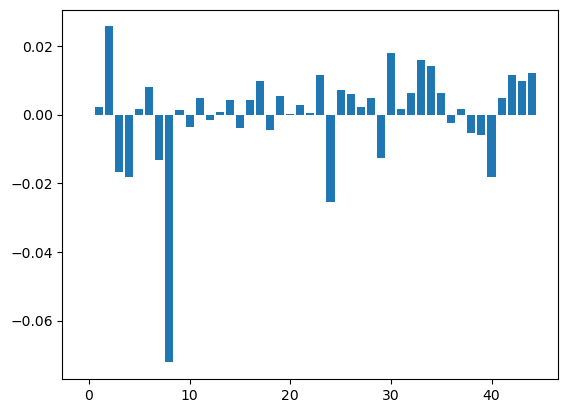

In [19]:
plt.bar(procyclicality_ind.index, procyclicality_ind.values)

In [20]:
procyclicality_ind.index

Index([ 8, 24, 40,  4,  3,  7, 29, 39, 38, 18, 15, 10, 36, 12,  0, 20, 22, 13,
        9, 37,  5, 31, 27,  1, 21, 14, 16, 11, 41, 28, 19, 26, 32, 35, 25,  6,
       43, 17, 42, 23, 44, 34, 33, 30,  2],
      dtype='int64')

In [21]:
procyclicality_ind.values

array([-7.22147079e-02, -2.55549753e-02, -1.82419326e-02, -1.81940214e-02,
       -1.67823978e-02, -1.31982909e-02, -1.25764132e-02, -5.89542840e-03,
       -5.49936091e-03, -4.42416961e-03, -4.02031305e-03, -3.73318471e-03,
       -2.55125661e-03, -1.48887808e-03, -7.85661115e-06,  4.80191468e-05,
        3.73321989e-04,  7.30572804e-04,  1.23249394e-03,  1.54286068e-03,
        1.63947205e-03,  1.71423667e-03,  2.05301266e-03,  2.24354379e-03,
        2.87532621e-03,  4.09306298e-03,  4.22347110e-03,  4.67031938e-03,
        4.93660031e-03,  4.93768869e-03,  5.51618832e-03,  5.94103505e-03,
        6.18050405e-03,  6.41082410e-03,  7.14502372e-03,  7.98414929e-03,
        9.63236805e-03,  9.86745836e-03,  1.14359659e-02,  1.14637251e-02,
        1.21526126e-02,  1.40471202e-02,  1.58507101e-02,  1.77955830e-02,
        2.56459170e-02])